In [3]:
import sys
sys.path.append('../')
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', context='poster')
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from figures.plotting import plot_correlations

eigmetric = 'alpha'
pooling = True
grayscale = False
data = pd.read_csv(f'../results/eigmetrics|pooling:{pooling}|grayscale:{grayscale}.csv')

tf_to_pt_layer_map = {'encode_2': 'layer1.0.relu', 'encode_3': 'layer1.1.relu', 
                      'encode_4': 'layer2.0.relu', 'encode_5': 'layer2.1.relu', 
                      'encode_6': 'layer3.0.relu', 'encode_7': 'layer3.1.relu', 
                      'encode_8': 'layer4.0.relu', 'encode_9': 'layer4.1.relu'}
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

data.head()

,80% variance,alpha,effective dimensionality,layer,architecture,task,kind,source
0,6.0,1.399630,2.787072,layer1.0.relu,ResNet18,None,Untrained,PyTorch
1,6.0,1.374839,2.731918,layer1.1.relu,ResNet18,None,Untrained,PyTorch
2,13.0,1.438830,3.199565,layer2.0.relu,ResNet18,None,Untrained,PyTorch
3,11.0,1.307675,2.921467,layer2.1.relu,ResNet18,None,Untrained,PyTorch
4,26.0,1.329084,3.456479,layer3.0.relu,ResNet18,None,Untrained,PyTorch


---
# Untrained and Supervised Object Classification

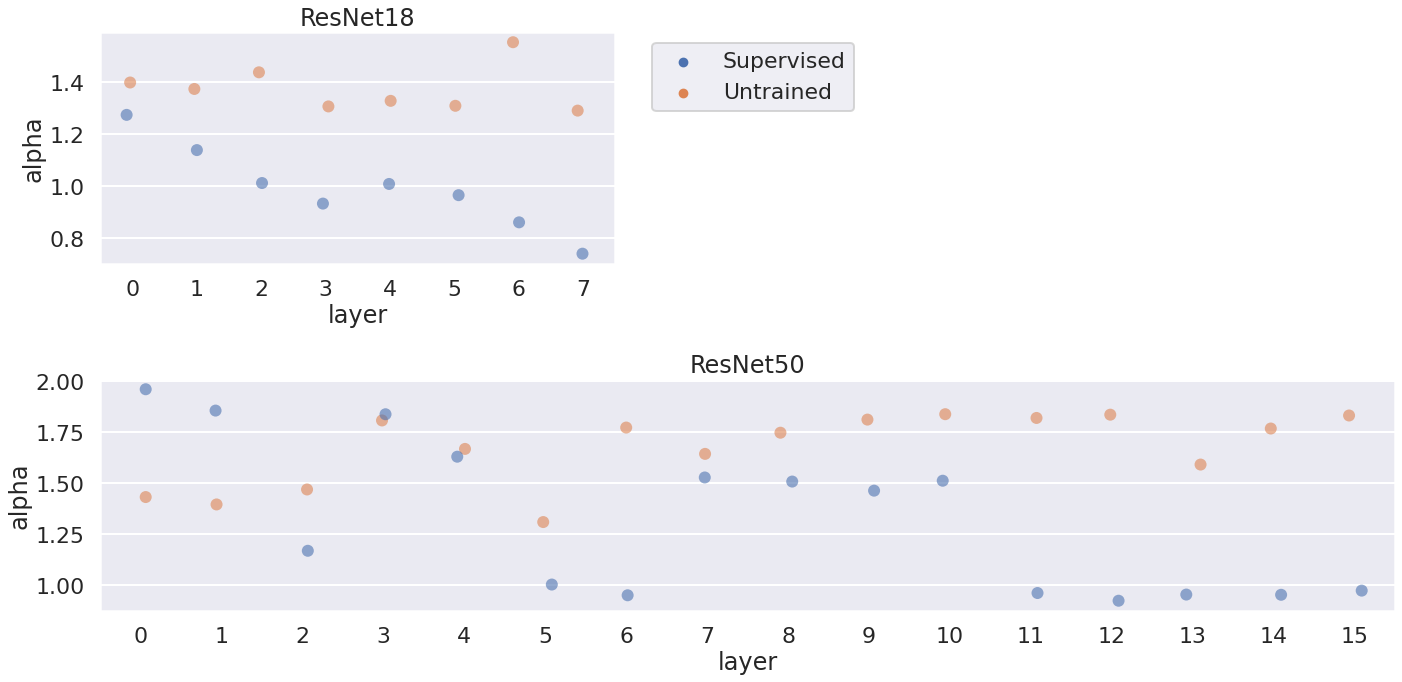

In [4]:
results = data[(data.source == 'PyTorch')]
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
sns.stripplot(x='layer', y=eigmetric, data=results[results.architecture == 'ResNet18'], ax=ax1, hue='kind',
              hue_order=['Supervised', 'Untrained'], s=12, alpha=0.6)
ax1.set_xticklabels(ax1.get_xticks())
ax1.set_title('ResNet18')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax2 = fig.add_subplot(gs[1, :])
sns.stripplot(x='layer', y=eigmetric, data=results[results.architecture == 'ResNet50'], ax=ax2, hue='kind',
              hue_order=['Supervised', 'Untrained'], s=12, alpha=0.6)
ax2.set_xticklabels(ax2.get_xticks())
ax2.set_title('ResNet50')
ax2.legend().remove()
fig.tight_layout()
plt.show()

---
# Yamins Self-Supervised

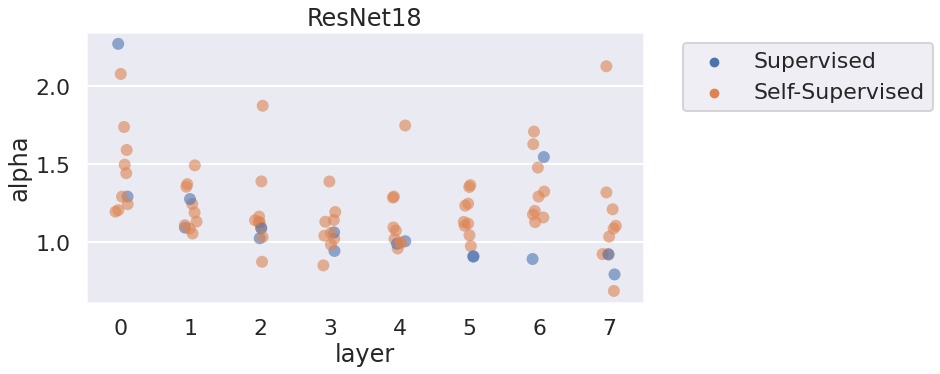

In [11]:
results = data[(data.source == 'VVS')]
fig, ax = plt.subplots(figsize=(10, 5))
sns.stripplot(x='layer', y=eigmetric, data=results, ax=ax, hue='kind',
              hue_order=['Supervised', 'Self-Supervised'], s=12, alpha=0.6)
ax.set_xticklabels(ax.get_xticks())
ax.set_title('ResNet18')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

---
# Taskonomy

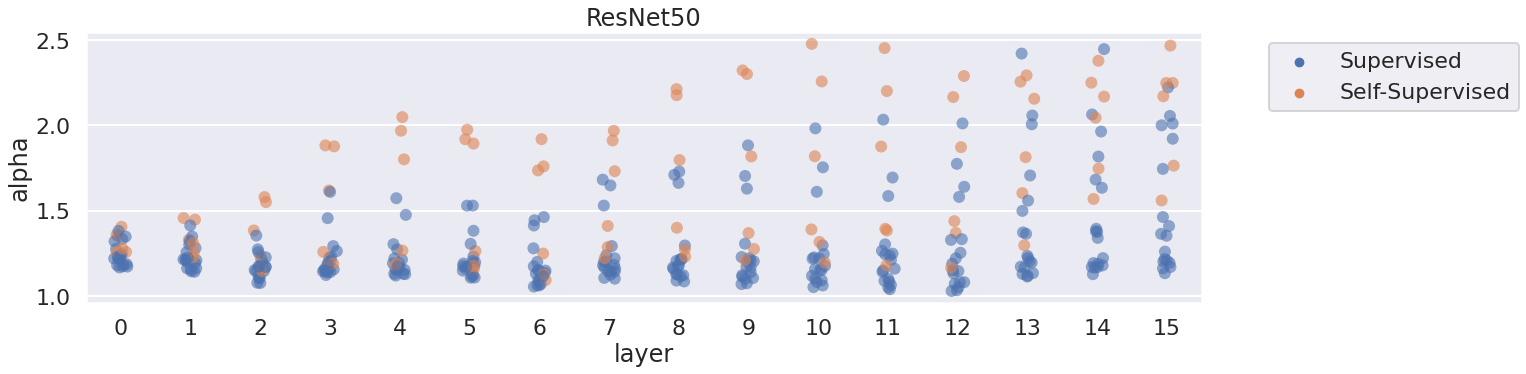

In [12]:
results = data[(data.source == 'Taskonomy')]
fig, ax = plt.subplots(figsize=(20, 5))
sns.stripplot(x='layer', y=eigmetric, data=results, ax=ax, hue='kind', 
              hue_order=['Supervised', 'Self-Supervised'], s=12, alpha=0.6)
ax.set_xticklabels(ax.get_xticks())
ax.set_title('ResNet50')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()